In [3]:
## upload the file
from google.colab import files
uploaded = files.upload()  # Select Sample - Superstore.csv


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [4]:
#installing and importing required libraries
!pip install pandas numpy matplotlib seaborn pandasql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=69eed9aee71e68dae541a37a958229e83192b23b84d90b9e85f08715e39af910
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [5]:
# load the dataset
import pandas as pd

try:
    df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')  # Try 'latin1' encoding
    print("Successfully loaded with latin1 encoding.")
except UnicodeDecodeError:
    try:
        df = pd.read_csv("Sample - Superstore.csv", encoding='cp1252') # Try 'cp1252' encoding
        print("Successfully loaded with cp1252 encoding.")
    except UnicodeDecodeError:
        print("Could not decode the file with common encodings.")
        print("Please check the file encoding or try another encoding.")

if 'df' in locals():
    display(df.head())

Successfully loaded with latin1 encoding.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

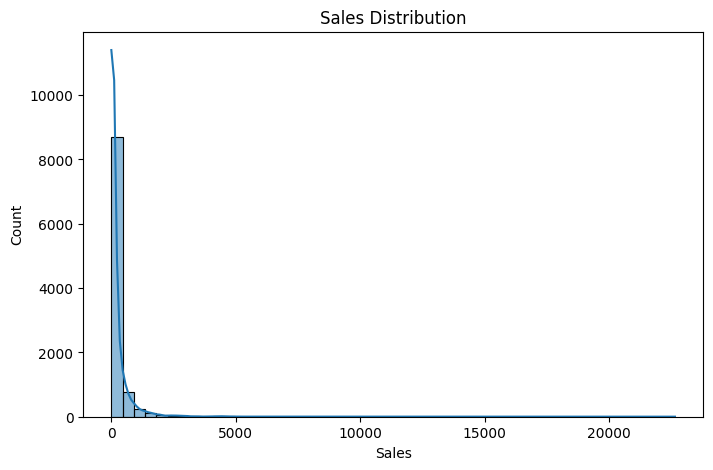

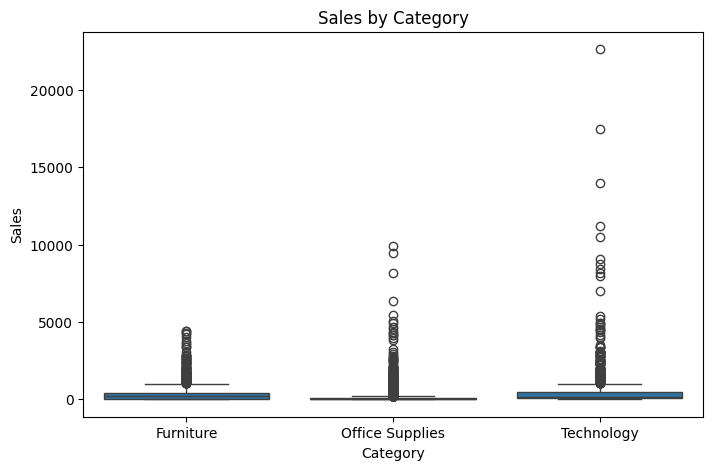

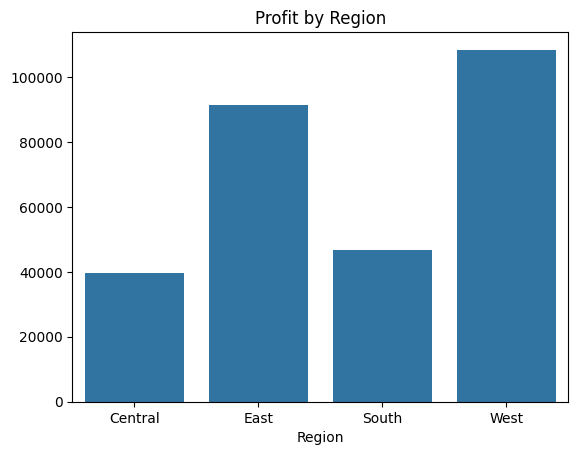

In [7]:
## Step 2: EDA
# First checking the  missing values and understand sales distribution.

# Basic info
print(df.info())
print(df.describe())

# Missing values
print(df.isnull().sum())

# total revenue & profit (quick check)
df['Revenue'] = df['Sales']
df['ProfitMargin'] = df['Profit'] / df['Sales']

print("Total Revenue:", df['Revenue'].sum())
print("Total Profit:", df['Profit'].sum())

# Sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

# Category vs Sales
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Sales", data=df)
plt.title("Sales by Category")
plt.show()

## Region-wise profit
region_profit = df.groupby("Region")['Profit'].sum()
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Profit by Region")
plt.show()

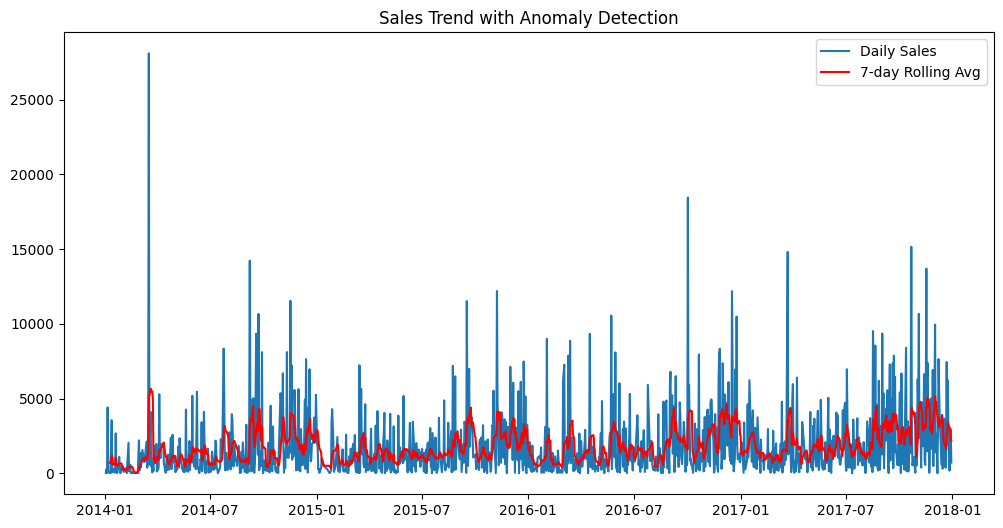

,Order Date,Sales,RollingMean
54,2014-03-18,28106.7160,5239.799429
162,2014-07-25,8341.2900,2469.207429
197,2014-09-08,14228.4280,3127.804714
207,2014-09-19,9338.6370,3075.704571
211,2014-09-23,10662.3370,4301.562143
217,2014-09-29,8109.0700,3154.657400
251,2014-11-04,6693.7480,3717.540143
258,2014-11-11,8114.5480,2173.165714
263,2014-11-17,11544.2740,3841.088529
265,2014-11-19,7226.0860,3914.779529


In [8]:
## Checking for unusual sales spikes or drops beyond normal range (Anomaly Deteection)
df['Order Date'] = pd.to_datetime(df['Order Date'])
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rolling mean for anomaly detection
daily_sales['RollingMean'] = daily_sales['Sales'].rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label="Daily Sales")
plt.plot(daily_sales['Order Date'], daily_sales['RollingMean'], label="7-day Rolling Avg", color='red')
plt.legend()
plt.title("Sales Trend with Anomaly Detection")
plt.show()

# Detect anomalies (sales 2 std dev above/below mean)
mean = daily_sales['Sales'].mean()
std = daily_sales['Sales'].std()
anomalies = daily_sales[(daily_sales['Sales'] > mean + 2*std) | (daily_sales['Sales'] < mean - 2*std)]
anomalies


In [12]:
#SQL Queries with Pandasql
# Total revenue
query1 = "SELECT SUM(Sales) as Total_Revenue FROM df;"
print(ps.sqldf(query1, locals()))

# Top 5 customers by sales
query2 = """
SELECT "Customer Name", SUM(Sales) as Total_Sales
FROM df
GROUP BY "Customer Name"
ORDER BY Total_Sales DESC
LIMIT 5;
"""
print(ps.sqldf(query2, locals()))

# Regional sales performance
query3 = """
SELECT Region, SUM(Sales) as Regional_Sales, SUM(Profit) as Regional_Profit
FROM df
GROUP BY Region
ORDER BY Regional_Sales DESC;
"""
print(ps.sqldf(query3, locals()))
# yearly Revenue Trend
q4 = """
SELECT strftime('%Y', `Order Date`) as Year,
       SUM(Sales) as Total_Sales
FROM df
GROUP BY Year
ORDER BY Year;
"""
res4 = ps.sqldf(q4, locals())
print("Yearly Revenue Trend")
print(res4)

   Total_Revenue
0   2.297201e+06
   Customer Name  Total_Sales
0    Sean Miller    25043.050
1   Tamara Chand    19052.218
2   Raymond Buch    15117.339
3   Tom Ashbrook    14595.620
4  Adrian Barton    14473.571
    Region  Regional_Sales  Regional_Profit
0     West     725457.8245      108418.4489
1     East     678781.2400       91522.7800
2  Central     501239.8908       39706.3625
3    South     391721.9050       46749.4303
Yearly Revenue Trend
   Year  Total_Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


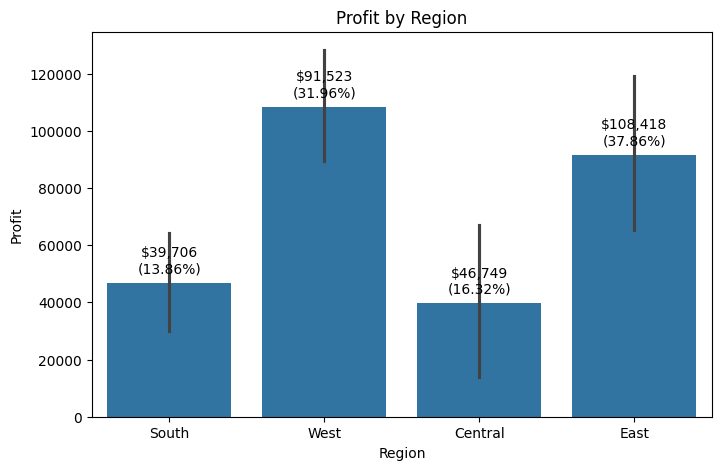

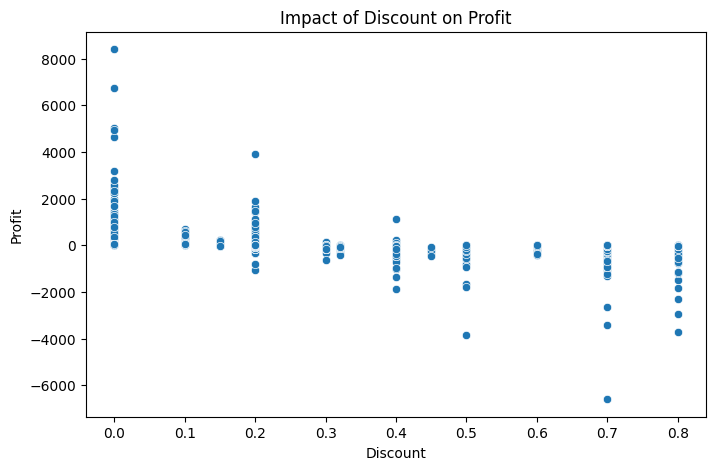

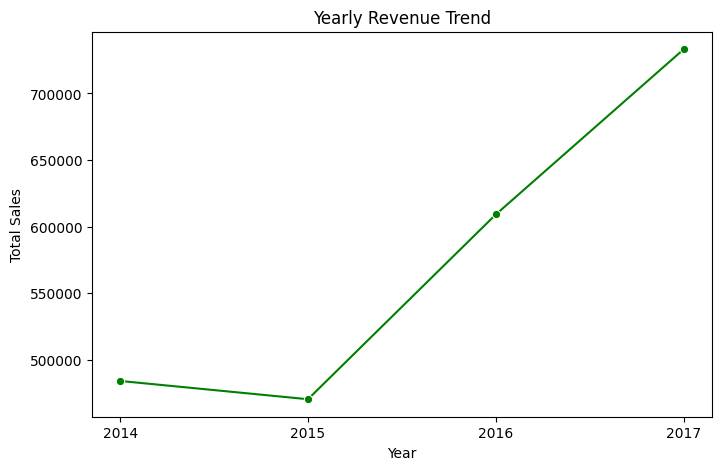

In [15]:
#visual insights
# Profit by Region
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Region", y="Profit", data=df, estimator=sum)
plt.title("Profit by Region")
# Calculate total profit and percentage share
total_profit = df["Profit"].sum()
region_profit = df.groupby("Region")["Profit"].sum().reset_index()
region_profit["Percent"] = (region_profit["Profit"] / total_profit * 100).round(2)

# Add value + % labels
for i, p in enumerate(ax.patches):
    profit_value = region_profit.iloc[i]["Profit"]
    percent_value = region_profit.iloc[i]["Percent"]
    ax.annotate(f"${profit_value:,.0f}\n({percent_value}%)",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=10, color="black", xytext=(0,5), textcoords="offset points")
plt.show()

# Sales vs Discount
plt.figure(figsize=(8,5))
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Impact of Discount on Profit")
plt.show()

#Yearly Revenue Trend
plt.figure(figsize=(8,5))
sns.lineplot(x="Year", y="Total_Sales", data=res4, marker="o", color="green")
plt.title("Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

# **Summary Insights:**



# **1. Profitability by Region**


  *   East and West are the most profitable regions, contributing ~38% and ~32% of total profits respectively.
  *   South (13.8%) and Central (16.3%) underperform significantly in terms of profit contribution.



*   **Recommendation**: Focus marketing and expansion in East & West; reassess discount/promotion strategies in South & Central.




# **2. Impact of Discounts on Profit**

* Clear negative relationship: higher discounts → lower profits (often negative).

* Heavy discounts (>50%) consistently result in losses, indicating over-discounting without sustainable sales uplift.

* **Recommendation:** Introduce discount caps and apply them strategically (seasonal sales, clearance).

# **3.Yearly Revenue Trend**

* Sales dipped slightly in 2015, but rebounded strongly in 2016 (+30%) and 2017 (+20%), showing consistent growth momentum.

* Suggests effective long-term business strategy, despite mid-term dips.

# **4. Customer-Level Insights**

* Top customers like Sean Miller (25k sales) and Tamara Chand (19k sales) contribute significantly to revenue.

* Indicates a skewed customer base — heavy reliance on top ~5% of customers.

* **Recommendation**: Strengthen customer loyalty programs to retain these high-value customers, while expanding acquisition in underrepresented regions.

# **5. Regional Sales & Profit**

* West: Highest revenue (725k) and strong profit (~108k).

* East: Strong performance (~679k sales, ~91k profit).

* Central & South: Lower revenue and much weaker profitability.

* **Recommendation**: Central & South should be analyzed for operational inefficiencies, supply chain costs, or ineffective pricing strategies.



